### Exemple de requettage de l'API en demandant la prédiction de la cible pour 1 observation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
%cd /content/drive/MyDrive/A5/Python\ for\ data\ analysis/PROJET/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/A5/Python for data analysis/PROJET


In [ ]:
df = pd.read_csv("biodeg.csv",
                 sep = ";",
                 header = None)

Piochons au hasard quelques observations (disons 100 arbitrairement)

In [ ]:
N = 100
df_random_obs = df.sample(n = N)

Affichons en quelques unes

In [ ]:
df_random_obs.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
192,4.263,3.1913,1,0,0,0,0,28.6,0,4,0,-1.68,3.410,2.187,9.533,4,1.038,1.135,0,0,0,1.159,0,0,0,0,2.000,0.015,0,19.933,4.143,0,0,0,2,3.643,3.379,0,8.478,0,0,RB
696,4.499,3.1749,0,0,1,0,0,50.0,0,0,4,0.00,3.059,1.125,9.311,0,1.007,1.118,0,0,0,1.315,1,0,0,0,2.136,0.047,0,0.000,1.481,0,0,3,0,3.653,2.646,2,8.126,0,0,NRB
806,5.272,3.2017,2,0,2,0,2,36.0,0,3,2,0.00,3.817,1.754,10.523,8,1.022,1.114,0,0,0,1.321,1,0,0,0,2.307,-0.001,0,0.000,2.952,0,1,1,0,4.702,2.587,1,9.602,0,0,NRB
232,3.732,2.6724,0,0,0,0,0,20.0,1,2,0,0.00,2.616,1.585,8.160,1,1.019,1.172,0,0,0,1.024,0,0,0,0,1.802,-0.247,0,0.000,2.488,0,0,1,3,2.938,3.167,1,6.799,0,0,RB
321,4.732,3.0634,0,0,0,0,0,28.6,4,4,0,0.00,3.327,0.827,10.090,8,1.014,1.149,0,0,0,1.118,1,0,0,0,2.236,0.004,0,0.000,1.026,0,0,0,0,3.426,2.278,0,7.977,0,0,NRB


Affichons la dataframe sans la cible

In [ ]:
df_random_obs[df_random_obs.columns[:-1]].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
192,4.263,3.1913,1,0,0,0,0,28.6,0,4,0,-1.68,3.410,2.187,9.533,4,1.038,1.135,0,0,0,1.159,0,0,0,0,2.000,0.015,0,19.933,4.143,0,0,0,2,3.643,3.379,0,8.478,0,0
696,4.499,3.1749,0,0,1,0,0,50.0,0,0,4,0.00,3.059,1.125,9.311,0,1.007,1.118,0,0,0,1.315,1,0,0,0,2.136,0.047,0,0.000,1.481,0,0,3,0,3.653,2.646,2,8.126,0,0
806,5.272,3.2017,2,0,2,0,2,36.0,0,3,2,0.00,3.817,1.754,10.523,8,1.022,1.114,0,0,0,1.321,1,0,0,0,2.307,-0.001,0,0.000,2.952,0,1,1,0,4.702,2.587,1,9.602,0,0
232,3.732,2.6724,0,0,0,0,0,20.0,1,2,0,0.00,2.616,1.585,8.160,1,1.019,1.172,0,0,0,1.024,0,0,0,0,1.802,-0.247,0,0.000,2.488,0,0,1,3,2.938,3.167,1,6.799,0,0
321,4.732,3.0634,0,0,0,0,0,28.6,4,4,0,0.00,3.327,0.827,10.090,8,1.014,1.149,0,0,0,1.118,1,0,0,0,2.236,0.004,0,0.000,1.026,0,0,0,0,3.426,2.278,0,7.977,0,0


Stringification de la dataframe sans la cible en json

In [ ]:
json_random_obs = df_random_obs[df_random_obs.columns[:-1]].to_json()

Requettage de l'API

In [ ]:
import requests

url = 'http://b1fce15bd7f2.ngrok.io/predict'

response = requests.post(url,
                         data = json_random_obs)

Regardons les prédictions de quelques unes des observations

In [ ]:
pred = pd.read_json(response.content)
pred.head()

,prediction (is_RB)
10,0
1002,0
1021,0
1039,0
104,1


Mesurons la précision de la prédiction sur notre échantillon :

In [ ]:
y_true = pd.get_dummies(df_random_obs[df_random_obs.columns[-1]],
                        drop_first = True)
y_pred = pred["prediction (is_RB)"].values

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Précision de la prédiction sur les {N} observations piochées aléatoirement : {accuracy_score(y_true, y_pred) * 100}%")

Précision de la prédiction sur les 100 observations piochées aléatoirement : 52.0%


Montrons la matrice de confusion :

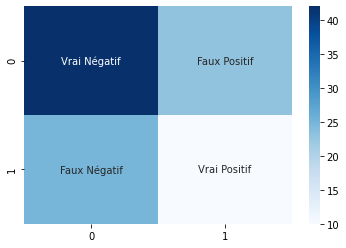

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

cf_matrix = confusion_matrix(y_true,
                             y_pred)

labels = ['Vrai Négatif',
          'Faux Positif',
          'Faux Négatif',
          'Vrai Positif']

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix,
            annot=labels,
            fmt='',
            cmap='Blues')